In [275]:
import pandas as pd
import numpy as np
sahisti = pd.read_csv("Glavna_tabela.csv")
sahisti

,Rang,Uporabniško ime,Ime,Priimek,Elo,ID,Država,Številka države,Naslov,Skupno igre,Skupno zmage,Skupno remiji,Skupno porazi,Strela elo,Metek elo,Opazovalci,Celina,Datum,Leto,Reciprikal prebivalstva države
0,1,ManuDavid2910,Manu,David,2966,6083387,India,69,FM,250,199,16,35,2988,3165,115258,Asia,2011-11-07,2011,7.054714e-10
1,2,MagnusCarlsen,Magnus,Carlsen,2941,3889224,Norway,104,GM,313,168,109,36,3308,3184,5269729,Europe,2010-08-26,2010,1.785380e-07
2,3,GutovAndrey,Andrey,Gutov,2936,26824392,United States,2,GM,143,141,1,1,2514,2312,542839,North America,2016-02-20,2016,2.940217e-09
3,4,SeanWinshand,Sean,Winshand,2884,57549096,Indonesia,70,GM,1174,540,525,109,3002,3032,203357,Asia,2019-02-19,2019,3.515695e-09
4,5,Bigfish1995,Vladimir,Fedoseev,2851,26303484,Slovenia,127,GM,709,391,174,144,3108,3000,261641,Europe,2016-01-23,2016,4.693430e-07
5,6,Firouzja2003,Alireza,Firouzja,2844,42022994,France,52,GM,287,121,99,67,3260,3357,917887,Europe,2018-01-05,2018,1.456282e-08
6,7,LyonBeast,Maxime,Vachier-Lagrave,2844,17306408,France,52,GM,364,178,124,62,3243,3174,534973,Europe,2014-05-15,2014,1.456282e-08
7,8,Hikaru,Hikaru,Nakamura,2839,15448422,United States,2,GM,879,501,273,105,3409,3341,10147804,North America,2014-01-06,2014,2.940217e-09
8,9,lachesisQ,Ian,Nepomniachtchi,2810,28417564,Russia,116,GM,343,150,119,74,3183,3091,456808,Asia,2016-05-30,2016,6.847987e-09
9,10,LevonAronian,Levon,Aronian,2808,26897402,United States,2,GM,409,176,143,90,3104,3057,115371,North America,2016-02-23,2016,2.940217e-09


# Analiza po državah
Naredili bomo analizo na dva načina. Prvi bo, da gledamo direktno po državah, drugi pa, da države grupiramo po celinah in naredimo analizo po celinah. Za začetek bomo pogledali katerih je top 5 držav iz katerih so šahisti. Med njimi pričakujemo Indijo, Rusijo in ZDA.

<Axes: xlabel='Država'>

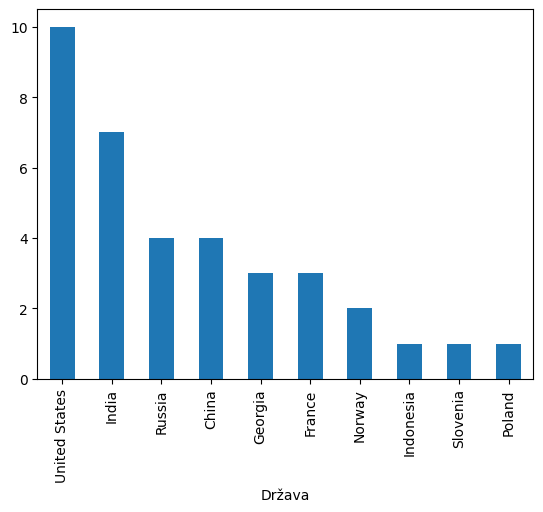

In [267]:
(sahisti["Država"].value_counts()).head(10).plot(kind="bar")

Sedaj podobno naredimo, le da namesto držav pogledamo Celine. Pričakujemo, da bo največ šahistov iz Azije, če ne drugega zato, ker je celina z največ prebivalci. Po drugi strani pričakujemo, da bo najmanj šahistov iz Afrike.

<Axes: ylabel='count'>

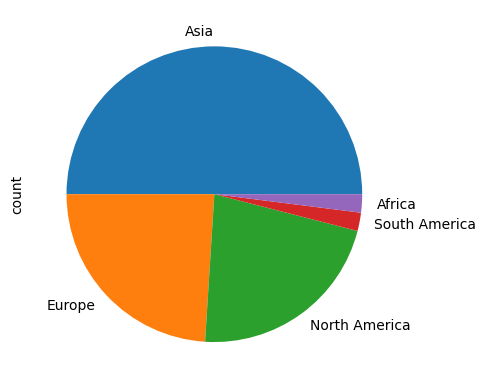

In [268]:
(sahisti["Celina"].value_counts()).plot(kind="pie")

Kot smo že nakazali, morda golo število šahistov ni dober pokazatelj kako dobra je država (oziroma celina) v šahu, saj so potem majhne države zapostavljene. Torej bo bolje gledati število šahistov glede na prebivalca.

<Axes: xlabel='Število šahistov na prebivalca', ylabel='Država'>

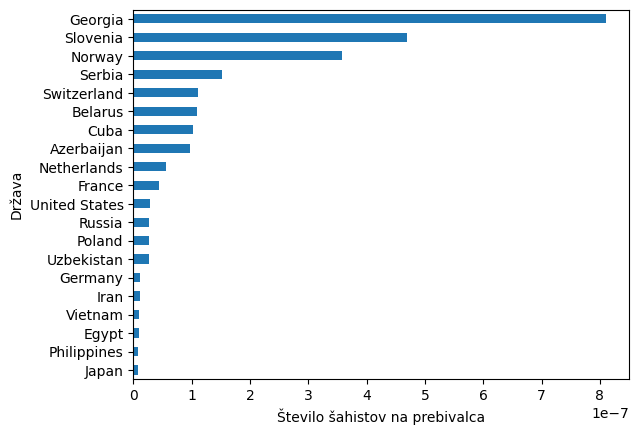

In [269]:
sahisti[["Država","Reciprikal prebivalstva države"]].groupby("Država").sum().sort_values("Reciprikal prebivalstva države").tail(20).plot(kind = "barh", xlabel="Število šahistov na prebivalca", legend=False)

<Axes: xlabel='Celina'>

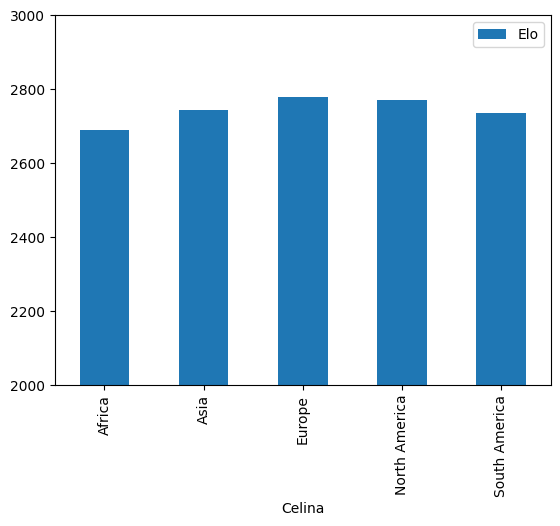

In [270]:
sahisti[["Celina","Elo"]].groupby("Celina").mean().plot(kind = "bar",ylim=(2000, 3000))

<Axes: xlabel='Država'>

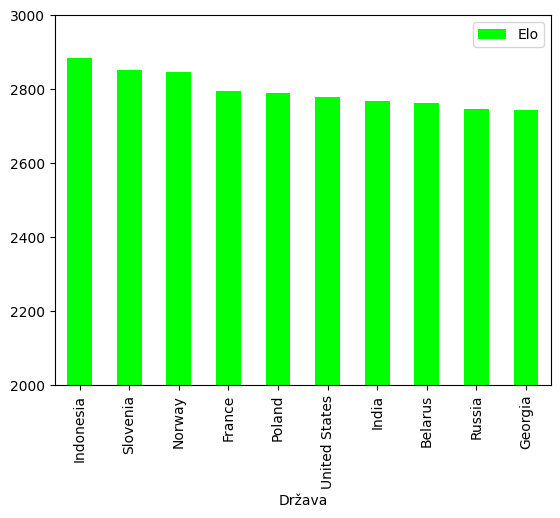

In [271]:
sahisti[["Država","Elo"]].groupby("Država").mean().sort_values("Elo", ascending=False).head(10).plot(kind = "bar",ylim=(2000, 3000),color = "lime")

# Analiza po času
Tudi po času bomo analizirali podatke na več načinov. Prvo bomo pogledali kdaj so se igralci v top 1500 pridružili na Šah.com in v katerem letu se jih e pridružilo največ. Prav tako bomo pogledali, če obstaja korelacija med Elotom in časum pridružitve. 


<Axes: xlabel='Datum', ylabel='Število šahistov'>

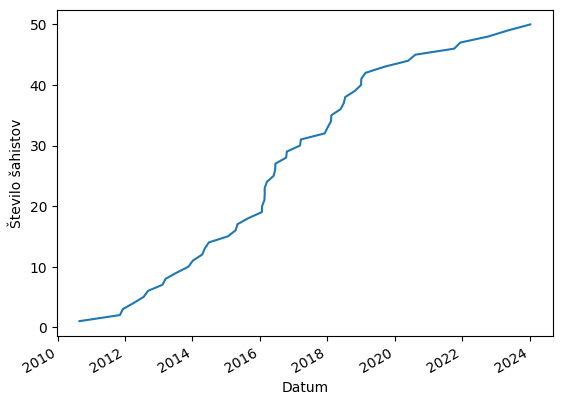

In [272]:
sahisti["Datum_2"] = pd.to_datetime(sahisti["Datum"])
sahisti["šteti"] = 1
sahisti["skupno_štetje"] = sahisti.sort_values("Datum_2")["šteti"].cumsum()
sahisti[["Datum_2","skupno_štetje"]].sort_values("Datum_2").plot(y="skupno_štetje",x="Datum_2",ylabel="Število šahistov",xlabel="Datum",legend=False)

<Axes: xlabel='Leto'>

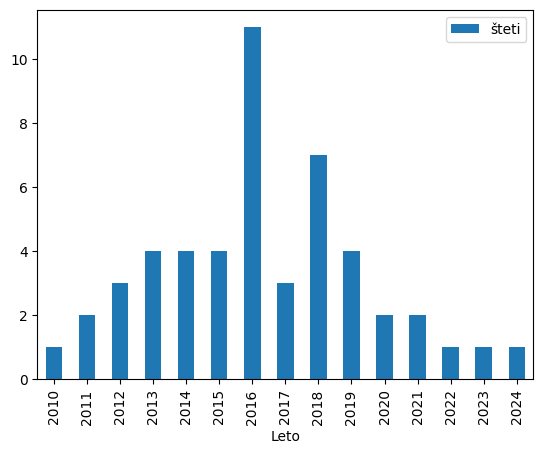

In [273]:

sahisti[["Leto","šteti"]].groupby("Leto").sum().plot(kind="bar")


In [ ]:
sahisti["čas_numpi"] = sahisti["Datum"]

ValueError: Could not convert object to NumPy datetime